# Business Problem with Customer Segmentation


An e-commerce company wants to segment its customers and determine marketing strategies according to these segments. For this purpose, we will define the behavior of customers and we will form groups according to clustering. In other words, we will take those who exhibit common behaviors into the same groups and we will try to develop sales and marketing techniques specific to these groups.¶


In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

import warnings
warnings.simplefilter(action = 'ignore')

# Data Set Story:¶


https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.
The company mainly sells unique all-occasion gift-ware.


Features Information:¶
> Features Information:¶
nvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal. The name of the country where a customer resides.¶nvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal. The name of the country where a customer resides.¶

Data Understanding


In [5]:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);  # to display all columns and rows
pd.set_option('display.float_format', lambda x: '%.2f' % x) # The number of numbers that will be shown after the comma.

onret = pd.read_excel('../input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx', 
                      sheet_name = 'Year 2010-2011', sep=';')
onret.head()

Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00   2.55     17850.00  United Kingdom  
1 2010-12-01 08:26:00   3.39     17850.00  United Kingdom  
2 2010-12-01 08:26:00   2.75     17850.00  United Kingdom  
3 2010-12-01 08:26:00   3.39     17850.00  United Kingdom  
4 2010-12-01 08:26:00   3.39     17850.00  United Kingdom

In [6]:
onret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df = onret.dropna() # Deleting missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [8]:
df.head(2)

Invoice StockCode                         Description  Quantity  \
0  536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00   2.55     17850.00  United Kingdom  
1 2010-12-01 08:26:00   3.39     17850.00  United Kingdom

In [9]:
df["Customer ID"] = df["Customer ID"].astype(int) # Values of float are converted to integer.
df["TotalPrice"] = df["Quantity"] * df["Price"]  # it is necessary to create a new variable by multiplying two variables
df.head()

Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  
0 2010-12-01 08:26:00   2.55        17850  United Kingdom       15.30  
1 2010-12-01 08:26:00   3.39        17850  United Kingdom       20.34  
2 2010-12-01 08:26:00   2.75        17850  United Kingdom       22.00  
3 2010-12-01 08:26:00   3.39        17850  United Kingdom       20.34  
4 2010-12-01 08:26:00   3.39        17850  United Kingdom       20.34

In [10]:
df[df['Invoice'].str.startswith("C", na = False)]  # Values starting with 'c' in the invoice variable indicate the returned products.

Invoice StockCode                          Description  Quantity  \
141     C536379         D                             Discount        -1   
154     C536383    35004C      SET OF 3 COLOURED  FLYING DUCKS        -1   
235     C536391     22556       PLASTERS IN TIN CIRCUS PARADE        -12   
236     C536391     21984     PACK OF 12 PINK PAISLEY TISSUES        -24   
237     C536391     21983     PACK OF 12 BLUE PAISLEY TISSUES        -24   
238     C536391     21980    PACK OF 12 RED RETROSPOT TISSUES        -24   
239     C536391     21484          CHICK GREY HOT WATER BOTTLE       -12   
240     C536391     22557     PLASTERS IN TIN VINTAGE PAISLEY        -12   
241     C536391     22553               PLASTERS IN TIN SKULLS       -24   
937     C536506     22960             JAM MAKING SET WITH JARS        -6   
1441    C536543     22632            HAND WARMER RED RETROSPOT        -1   
1442    C536543     22355            CHARLOTTE BAG SUKI DESIGN        -2   
1971    C536548     22244           3 HOOK HANGER MAGIC GARDEN        -4   
1972    C536548     22242        5 HOOK HANGER MAGIC TOADSTOOL        -5   
1973    C536548     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -1   
1974    C536548     22892    SET OF SALT AND PEPPER TOADSTOOLS        -7   
1975    C536548     22654                   DELUXE SEWING KIT         -1   
1976    C536548     22767          TRIPLE PHOTO FRAME CORNICE         -2   
1977    C536548     22333    RETROSPOT PARTY BAG + STICKER SET        -1   
1978    C536548     22245         HOOK, 1 HANGER ,MAGIC GARDEN        -2   
1979    C536548     22077               6 RIBBONS RUSTIC CHARM        -6   
1980    C536548     22631             CIRCUS PARADE LUNCH BOX         -1   
1981    C536548     22168        ORGANISER WOOD ANTIQUE WHITE         -2   
1982    C536548     21218               RED SPOTTY BISCUIT TIN        -3   
1983    C536548     20957         PORCELAIN HANGING BELL SMALL        -1   
1984    C536548     22580         ADVENT CALENDAR GINGHAM SACK        -4   
3170    C536606     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -2   
3338    C536622     22752         SET 7 BABUSHKA NESTING BOXES        -2   
3409    C536625     22839      3 TIER CAKE TIN GREEN AND CREAM        -2   
3693    C536642     21463                 MIRRORED DISCO BALL         -1   
3897    C536734     22780       LIGHT GARLAND BUTTERFILES PINK        -4   
3898    C536734     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   
3919    C536737     22798     ANTIQUE GLASS DRESSING TABLE POT        -2   
4268    C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
4288    C536758     21314        SMALL GLASS HEART TRINKET POT        -1   
4306    C536760     22175                    PINK OWL SOFT TOY        -1   
4307    C536760     22273                 FELTCRAFT DOLL MOLLY        -3   
4836    C536807     22501           PICNIC BASKET WICKER LARGE        -2   
4837    C536807     22778                   GLASS CLOCHE SMALL        -1   
4853    C536812     22578   WOODEN STAR CHRISTMAS SCANDINAVIAN       -36   
4854    C536812     22574    HEART WOODEN CHRISTMAS DECORATION      -192   
4855    C536812     22593               CHRISTMAS GINGHAM STAR      -144   
4856    C536812     22595              CHRISTMAS GINGHAM HEART      -144   
4857    C536812     22588            CARD HOLDER GINGHAM HEART      -192   
4858    C536812     22130     PARTY CONE CHRISTMAS DECORATION       -144   
4876    C536814     21527    RED RETROSPOT TRADITIONAL TEAPOT         -2   
4877    C536814    72799E     IVORY PILLAR CANDLE SILVER FLOCK        -6   
4878    C536814     85066          CREAM SWEETHEART MINI CHEST        -2   
4879    C536814     21586      KINGS CHOICE GIANT TUBE MATCHES       -12   
4880    C536814     21258           VICTORIAN SEWING BOX LARGE        -1   
4881    C536815     85175                CACTI T-LIGHT CANDLES        -1   
4882    C536815     22178      VICTORIAN GLASS HANGING T

**Customer Segmentation with RFM Scores**

Consists of initials of Recency, Frequency, Monetary expressions.
It is a technique that helps determine marketing and sales strategies based on customers' buying habits.
- Recency (innovation): Time since customer last purchased
-- In other words, it is the “time since the last contact of the customer”.
-- Today's date - Last purchase
-- To give an example, if we are doing this analysis today, today's date is the last product purchase date.
-- This can be for example 20 or 100. We know that 20 customers are hotter. He has been in contact with us recently.
- Frequency: Total number of purchases.
- Monetary (Monetary Value): Total spending by the customer.

Recency
What is today? Now if we take today's date, then there will be a very serious difference.

For this reason, let us determine ourselves a "today" according to the structure of this data set.

We can set this day as the maximum day of the data set.

We can segmentation according to the day of the last recording.

In [11]:
df["InvoiceDate"].max()


Timestamp('2011-12-09 12:50:00')

In [12]:
today = df["InvoiceDate"].max()
today

Timestamp('2011-12-09 12:50:00')

In [13]:
temp_df = (today - df.groupby("Customer ID").agg({"InvoiceDate":"max"})) # Show the last shopping dates of each customer.
temp_df.head()

InvoiceDate
Customer ID                  
12346       325 days 02:33:00
12347         1 days 20:58:00
12348        74 days 23:37:00
12349        18 days 02:59:00
12350       309 days 20:49:00

For each customer, we need to deduce the customer`s last purchase date from today`s date.

Then we have singularized customer deadlines.

In [17]:
temp_df.rename(columns={"InvoiceDate":"Recency"},inplace=True)
recency_df = temp_df["Recency"].apply(lambda x: x.days)
recency_df.head()

Customer ID
12346    325
12347      1
12348     74
12349     18
12350    309
Name: Recency, dtype: int64

In [18]:
recency_df = pd.DataFrame(recency_df)
recency_df.head()

Recency
Customer ID         
12346            325
12347              1
12348             74
12349             18
12350            309

# FREQUENCY

In [19]:
temp_df = df.groupby(["Customer ID", "Invoice"]).agg({"Invoice": "count"})
freq_df = temp_df.groupby("Customer ID").agg({"Invoice":"count"})
freq_df.rename(columns={"Invoice":"Frequency"},inplace = True)
freq_df.head()

Frequency
Customer ID           
12346                2
12347                7
12348                4
12349                1
12350                1

MONETARY

In [20]:
monetary_df = df.groupby("Customer ID").agg({"TotalPrice": "sum"})
monetary_df.rename(columns={"TotalPrice":"Monetary"},inplace=True)
monetary_df.head()

Monetary
Customer ID          
12346            0.00
12347         4310.00
12348         1797.24
12349         1757.55
12350          334.40

Now, we need to score according to the most recent (Recency), the cyclic (Frequency) and the monetary expenditure (Monetary).

In [21]:
rfm_df = pd.concat([recency_df, freq_df, monetary_df], axis = 1)
rfm_df.head()

Recency  Frequency  Monetary
Customer ID                              
12346            325          2      0.00
12347              1          7   4310.00
12348             74          4   1797.24
12349             18          1   1757.55
12350            309          1    334.40

Text(0.5, 0, 'Attributes')

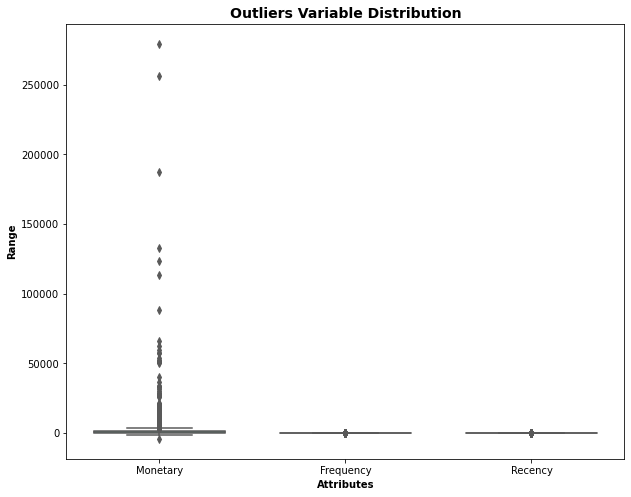

In [22]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm_df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [24]:
# Removing (statistical) outliers for Monetary
Q1 = rfm_df.Monetary.quantile(0.05)
Q3 = rfm_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Monetary >= Q1 - 1.5*IQR) & (rfm_df.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm_df.Recency.quantile(0.05)
Q3 = rfm_df.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Recency >= Q1 - 1.5*IQR) & (rfm_df.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm_df.Frequency.quantile(0.05)
Q3 = rfm_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Frequency >= Q1 - 1.5*IQR) & (rfm_df.Frequency <= Q3 + 1.5*IQR)]

In [25]:
rfm_1 = rfm_df.copy()

In [26]:
rfm_df.head()

Recency  Frequency  Monetary
Customer ID                              
12346            325          2      0.00
12347              1          7   4310.00
12348             74          4   1797.24
12349             18          1   1757.55
12350            309          1    334.40

# Scoring for RFM
Let's start with the last 5 here. Let's use the 'qcut' method to score.

In [27]:
rfm_df["RecencyScore"] = pd.qcut(rfm_df['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm_df["FrequencyScore"] = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
rfm_df["MonetaryScore"] = pd.qcut(rfm_df['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm_df["RFM_SCORE"] = (rfm_df['RecencyScore'].astype(str) 
                                + rfm_df['FrequencyScore'].astype(str) 
                                + rfm_df['MonetaryScore'].astype(str))
rfm_df.head()

Recency  Frequency  Monetary RecencyScore FrequencyScore  \
Customer ID                                                             
12346            325          2      0.00            1              2   
12347              1          7   4310.00            5              5   
12348             74          4   1797.24            2              4   
12349             18          1   1757.55            4              1   
12350            309          1    334.40            1              1   

            MonetaryScore RFM_SCORE  
Customer ID                          
12346                   1       121  
12347                   5       555  
12348                   4       244  
12349                   4       414  
12350                   2       112

Let's do regex segmentation. With the help of regex, we will set rfm aside and consider r and f.
Example: If you see 1-2 in r and 1-2 in f, write 'Hibernating'

In [28]:
seg_map = {r'[1-2][1-2]': 'Hibernating',
            r'[1-2][3-4]': 'At Risk',
            r'[1-2]5': 'Can\'t Loose',
            r'3[1-2]': 'About to Sleep',
            r'33': 'Need Attention',
            r'[3-4][4-5]': 'Loyal Customers',
            r'41': 'Promising',
            r'51': 'New Customers',
            r'[4-5][2-3]': 'Potential Loyalists',
            r'5[4-5]': 'Champions'}
    
rfm_df['Segment'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)
rfm_df.head()

Recency  Frequency  Monetary RecencyScore FrequencyScore  \
Customer ID                                                             
12346            325          2      0.00            1              2   
12347              1          7   4310.00            5              5   
12348             74          4   1797.24            2              4   
12349             18          1   1757.55            4              1   
12350            309          1    334.40            1              1   

            MonetaryScore RFM_SCORE      Segment  
Customer ID                                       
12346                   1       121  Hibernating  
12347                   5       555    Champions  
12348                   4       244      At Risk  
12349                   4       414    Promising  
12350                   2       112  Hibernating

KMeans:

In [29]:
rfm = rfm_1
rfm.head()

Recency  Frequency  Monetary
Customer ID                              
12346            325          2      0.00
12347              1          7   4310.00
12348             74          4   1797.24
12349             18          1   1757.55
12350            309          1    334.40

Rescaling the Attributes
It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:
Min-Max scaling
Standardisation (mean-0, sigma-1)
Here, we will use Min-Max scaling.


In [30]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler((0,1))
cols = rfm.columns
index = rfm.index
scaled_rfm = mms.fit_transform(rfm)
scaled_rfm = pd.DataFrame(scaled_rfm, columns=cols, index = index)
scaled_rfm.head()

Recency  Frequency  Monetary
Customer ID                              
12346           0.87       0.03      0.27
12347           0.00       0.19      0.55
12348           0.20       0.09      0.39
12349           0.05       0.00      0.39
12350           0.83       0.00      0.30

# Building the Model
K-Means Clustering¶
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:
First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans = kmeans.fit(scaled_rfm)
kmeans

KMeans(n_clusters=4)

In [32]:
kmeans.cluster_centers_

array([[0.04487773, 0.41912879, 0.55765547],
       [0.7948756 , 0.0156759 , 0.29754015],
       [0.42363793, 0.04298403, 0.31407143],
       [0.0952501 , 0.07569416, 0.33723616]])

In [33]:
kmeans.labels_

array([1, 0, 3, ..., 3, 0, 3], dtype=int32)

OPTIMAL NUMBER OF CLUSTER

Elbow Curve to get the right number of Clusters A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

Text(0.5, 1.0, 'Elbow method for Optimum number of clusters')

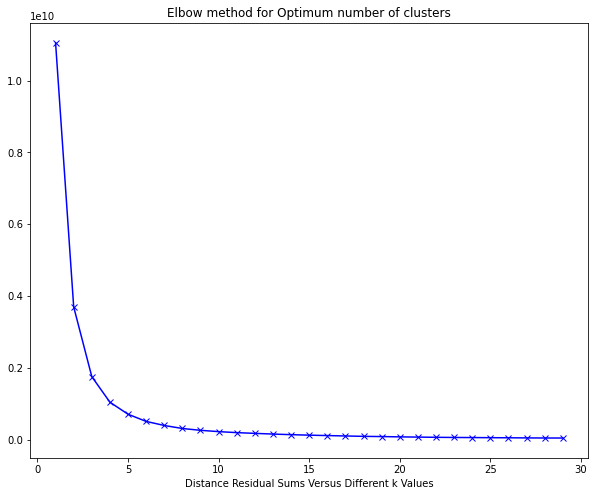

In [34]:
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(rfm)
    ssd.append(kmeans.inertia_)
    
plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums Versus Different k Values")
plt.title("Elbow method for Optimum number of clusters")

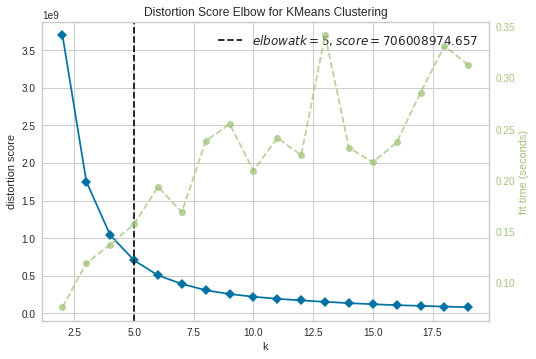

In [35]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(rfm)
visu.poof();

# MODEL OPTIMIZATION

In [36]:
# Final model with k=6
kmeans = KMeans(n_clusters = 5, max_iter=50).fit(rfm)
kmeans.labels_

array([0, 2, 3, ..., 0, 3, 3], dtype=int32)

In [37]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_

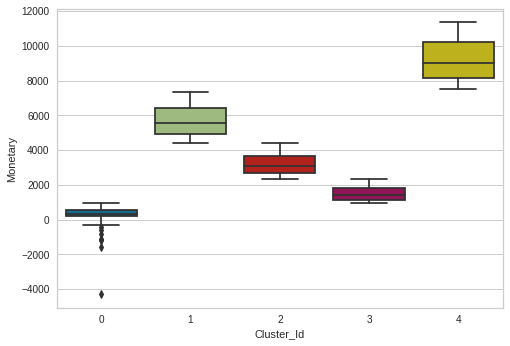

In [38]:
# Box plot to visualize Cluster Id vs Monetary
sns.boxplot(x = 'Cluster_Id', y = 'Monetary', data = rfm);

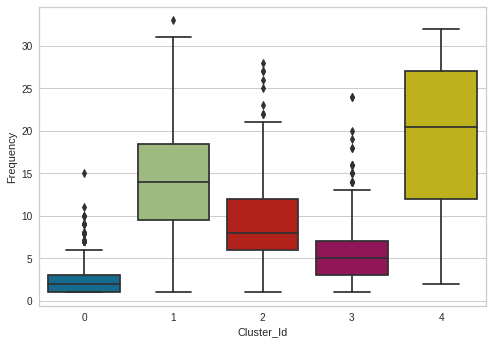

In [39]:
# Boxplot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data = rfm);

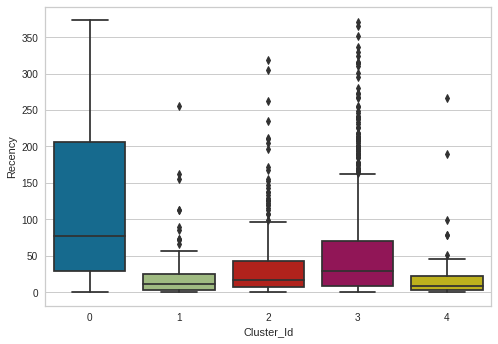

In [40]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data = rfm);

In [41]:
rfm.groupby("Cluster_Id").agg({"Cluster_Id":"count"})

Cluster_Id
Cluster_Id            
0                 2661
1                  159
2                  420
3                  982
4                   58

In [42]:
rfm.groupby("Cluster_Id").agg(np.mean)

Recency  Frequency  Monetary
Cluster_Id                              
0            122.67       2.05    383.44
1             21.15      14.52   5662.72
2             33.27       9.31   3178.57
3             52.78       5.41   1493.40
4             23.05      19.07   9161.85

HIERARCHICAL CLUSTERING

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

Divisive Agglomerative.

Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

https://www.saedsayad.com/images/Clustering_complete.png

Average Linkage:

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

https://www.saedsayad.com/images/Clustering_average.png

In [44]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
hc_complete = linkage(rfm, "complete") #Complete Linkage
hc_average = linkage(rfm, "average") # Average Linkage

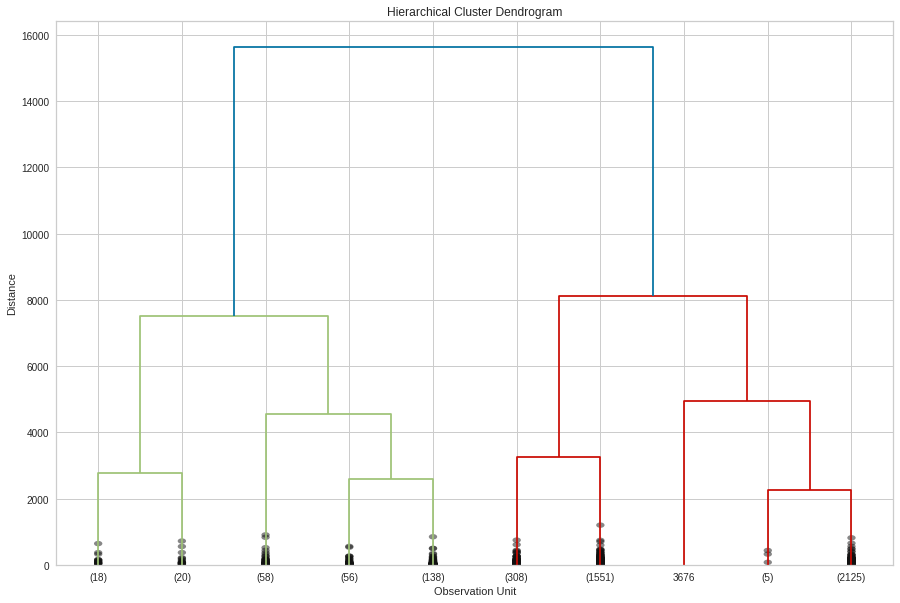

In [45]:
plt.figure(figsize = (15,10))
plt.title("Hierarchical Cluster Dendrogram")
plt.xlabel("Observation Unit")
plt.ylabel("Distance")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
          leaf_font_size = 10);

In [46]:
# Cutting the Dendrogram based on K
cluster_labels = cut_tree(hc_complete, n_clusters = 5).reshape(-1, )
cluster_labels

array([0, 1, 2, ..., 0, 2, 2])

In [47]:
# Assign cluster labels
rfm['Cluster_Labels'] = cluster_labels
rfm['Cluster_Labels'] = rfm['Cluster_Labels'] + 1
rfm.head()

Recency  Frequency  Monetary  Cluster_Id  Cluster_Labels
Customer ID                                                          
12346            325          2      0.00           0               1
12347              1          7   4310.00           2               2
12348             74          4   1797.24           3               3
12349             18          1   1757.55           3               3
12350            309          1    334.40           0               1

In [ ]:
rfm.groupby("Cluster_Labels").agg(np.mean)

In [ ]:
# Plot Cluster Id vs Monetary
sns.boxplot(x = 'Cluster_Labels', y = 'Monetary', data = rfm);

In [ ]:
# Plot Cluster Id vs Frequency
sns.boxplot(x = 'Cluster_Labels', y = 'Frequency', data = rfm);

In [ ]:
# Plot Cluster Id vs Recency
sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm);

Final Analysis

According to K-Means Clustering with optimized 5 Cluster Ids;

Customers belong to Cluster Id 4 are the ones having the highest amount of transactions as compared to other cluster Ids.\ Customers in Cluster Id 1 are the ones bring us the least amount of money and not recent buyers.

For the Hierarchical Clustering Model, customers in cluster_label 4 has the highest amount of transactions.\ Customers in cluster_label 1 are the ones having the least transaction frequency.